4.1347117
0.037642814
0.037642814
0.03764281
0.03764281
0.03764281
0.037642814
0.037642814
0.037642814
0.037642814
0.037642814
0.037642814
0.037642814
0.03764281
0.037642814
0.03764281
0.03764281
0.03764281
0.03764281
0.03764281
0.03764281
0.037642814
0.03764281
0.037642814
0.037642814
0.03764281
0.037642814
0.037642814
0.037642814
0.037642814
0.037642814
0.037642814
0.037643213
0.037642825
0.037642814
0.037642814
0.037642844
0.037642814
0.037642814
0.037642814


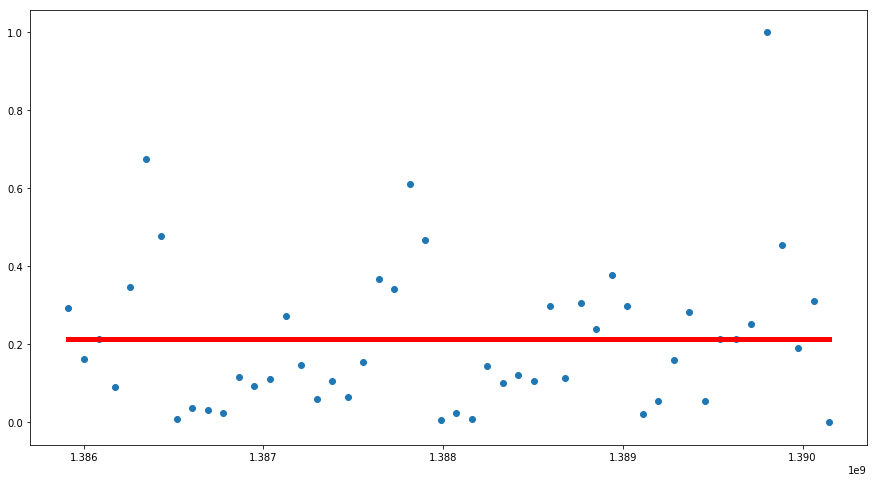

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小


def add_layer(inputs, in_size, out_size, activation_function=None):  # 一层神经网络
    W = tf.Variable(tf.random_normal([in_size, out_size]))  # 权值
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)  # 偏值
    Wx_plus_b = tf.matmul(inputs, W) + biases  # 未激活的函数 y = W x + b 未被激活函数弯曲
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


# x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
# noise = np.random.normal(0, 0.1, x_data.shape)
# y_data = np.square(x_data) - 3 + noise

import pandas as pd
air = pd.read_csv('fog.csv')
x_data = air['timestamp'].head(50).values[:, np.newaxis]
df = air['pm25'].head(50)
y_nor = (df - df.min()) / (df.max() - df.min())
y_data=y_nor.values[:, np.newaxis]

xs = tf.placeholder(tf.float32, [None, 1])  # 这里要改维度，这两个就是先把位置空出来，让变量可以带进去
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.tanh)              # 这里要改维度
l2 = add_layer(l1,10,10,activation_function=tf.nn.tanh)
predition = add_layer(l2, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - predition), reduction_indices=[1]))  # 这个是误差（均方差），通过均方差反向传输
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)  # 通过这个优化器减小误差，注意学习效率（跨步）不要太大
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
# plt.show()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # 所有变量初始化
    for i in range(20000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 500 == 0:
            # try:
            #     ax.lines.remove(lines[0])
            # except:
            #     pass
            # predition_value = sess.run(predition,feed_dict={xs: x_data})
            # lines = ax.plot(x_data,predition_value,'r-',lw=5)
            # plt.pause(0.1)
            print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
    predition_value = sess.run(predition, feed_dict={xs: x_data})
    lines = ax.plot(x_data, predition_value, 'r-', lw=5)
    plt.pause(0.1)

# plt.show()